# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [3]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V = np.pi**(D/2)/sp.gamma(1+D/2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

In [4]:
print(getSphereVolumeExact(2))
print(getSphereVolumeExact(3)-4/3*np.pi)

3.141592653589793
8.881784197001252e-16


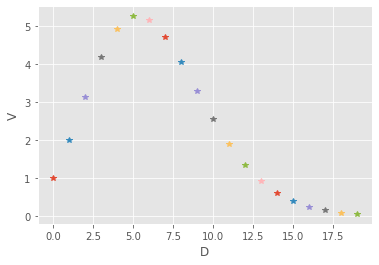

In [6]:
for i in range(20):
    plt.plot(i, getSphereVolumeExact(i), '*') 
plt.xlabel("D")
plt.ylabel("V")
plt.show()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [10]:
rndm = np.random.RandomState(500)
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    pt = rndm.uniform(low=-1, high=1,size=(D, N))
    norm = np.linalg.norm(pt, axis=0)
    ins = norm <= 1.
    per = np.count_nonzero(ins)
    V = (2*R)**D*per/N
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

In [11]:
def epsilon(a, b):
    return abs(a-b)/a

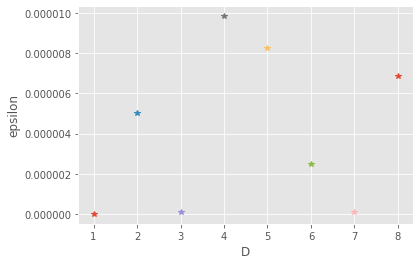

In [31]:
for D in range(1, 9):
    V_exact = getSphereVolumeExact(D)
    for N in range(10, 10**5):
        V_random = getSphereVolumePseudorandom(N, D)
        if epsilon(V_exact, V_random) < 1e-5:
            break
    plt.plot(D, epsilon(V_exact,V_random), '*')
plt.xlabel("D")
plt.ylabel("epsilon")
plt.show()

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [17]:
import sobol_seq

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [26]:
#sobol_seq.i4_sobol_generate?

In [18]:
def getSphereVolumeQuasirandom(N, D, R = 1.):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    pt = sobol_seq.i4_sobol_generate(D, N)
    norm = np.linalg.norm(pt, axis=1)
    ins = norm <= 1.
    per = np.count_nonzero(ins)
    V = (2*R)**D*per/N
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

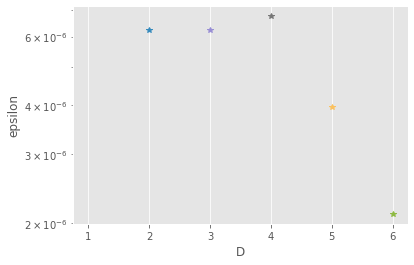

In [32]:
for D in range(1, 7):
    V_exact = getSphereVolumeExact(D)
    for N in range(10, 10**5):
        V_random = getSphereVolumeQuasirandom(N, D)
        if epsilon(V_exact, V_random) < 1e-5:
            break
    plt.plot(D, epsilon(V_exact, V_random), '*')
plt.xlabel("D")
plt.ylabel("epsilon")
plt.yscale("log")
plt.show()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Что могу сказать точно, так это квазислучайная последовательность работает сильно медленее, но она, как кажется, поточнее

## Задание 2

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [20]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state = 2*rndm.randint(0, 2, size=(N,N))-1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [21]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    nearest = [[i - 1, j], [i + 1, j], [i, j - 1], [i, j + 1]]
    
    nearest_sum = 0
    for near in nearest:
        if near[0] >= 0 and near[0] <= N and near[1] >= 0 and near[1] <= N:
            nearest_sum += state[near[0]][near[1]]
    
    dE = -state[i][j] * nearest_sum
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [22]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    N = len(state)
    dE = np.zeros(N**2)
    state1 = np.copy(state)
    i, j = rndm.randint(0, N-1, size=(2, N**2))
    for k in range(N**2):
        dE[k] = getDeltaE(i[k], j[k], state1)
        if dE[k] <= 0:
            state[i[k], j[k]] = -state[i[k], j[k]]
        else:  
            if (rndm.random() < np.exp(-dE[k]/T)):
                state[i[k], j[k]] = -state[i[k], j[k]]
    return state
    

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [23]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E=0
    N = len(state) 
    state1 = np.hstack((state[:, N-1].reshape(N, -1), state, state[:, 0].reshape(N, -1)))
    state2 = np.vstack((state1[N-1, :], state1, state1[0, :]))
    for i in range(1, N):
        for j in range(1, N):
            E += -state2[i,j]*np.sum(state2[i+1,j]+state2[i-1,j]+state2[i,j+1]+state2[i,j-1])
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [24]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M = np.sum(state)
    return M

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [29]:
N       = 12       # размер решетки NxN
Nt      = 100         # количество точек температуры
eqSteps = 317        # количество раз выполнения makeFlip для установления равновесия
steps   = 100         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

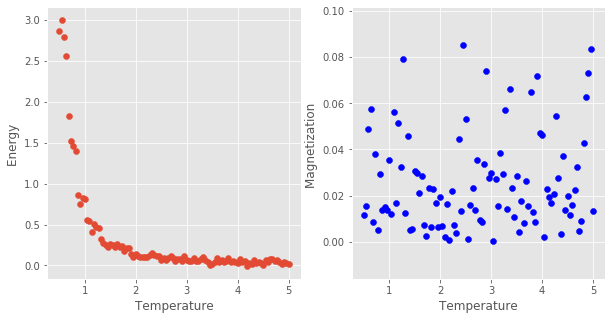

In [30]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Видимо должны, но судя по вышестоящим графикам это не очень очевидно;)

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [ ]:
N = 64
state = getInitialState(N)

In [ ]:
plt.figure()
# Write your code here
makeFlip(0.5, state);

In [ ]:
# Write your answer here